In [1]:
import pandas as pd
import utils
import json
import matplotlib.pyplot as plt
import os
from dashreq import get_dash_data, get_dash_req

In [2]:
os.chdir('../')

In [3]:
dash_req = get_dash_req()
dash_data = get_dash_data()

In [4]:
table_names = list(map(lambda x: x['queryName'], dash_req['requests']))
data = list(map(lambda x: x['data'], dash_data))
tables_meta = dict(zip(table_names, dash_req['requests']))
tables_dict = dict(zip(table_names, data))

print(tables_dict.keys())

dict_keys(['lastUpdate', 'infectedPerDate', 'updatedPatientsOverallStatus', 'sickPerDateTwoDays', 'sickPatientPerLocation', 'patientsPerDate', 'deadPatientsPerDate', 'recoveredPerDay', 'testResultsPerDate', 'infectedByAgeAndGenderPublic', 'breatheByAgeAndGenderPublic', 'severeByAgeAndGenderPublic', 'deadByAgeAndGenderPublic', 'isolatedDoctorsAndNurses', 'contagionDataPerCityPublic', 'hospitalStatus', 'doublingRate', 'CalculatedVerified', 'otherHospitalizedStaff'])


In [9]:
dfs = dict()
for table_name, table_data in tables_dict.items():
    if tables_meta[table_name]['single']:
        dfs[table_name] = pd.DataFrame(tables_dict[table_name], index=[0])
    else:
        dfs[table_name] = pd.DataFrame(tables_dict[table_name])

    if 'date' in dfs[table_name]:
        dfs[table_name]['date'] = pd.to_datetime(dfs[table_name]['date'])
        dfs[table_name].set_index(['date'], inplace=True)
    

In [12]:
dfs['patientsPerDate'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2020-03-02 00:00:00+00:00 to 2020-09-27 00:00:00+00:00
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   new_hospitalized                   210 non-null    int64  
 1   Counthospitalized                  210 non-null    int64  
 2   Counthospitalized_without_release  210 non-null    int64  
 3   CountHardStatus                    210 non-null    int64  
 4   CountMediumStatus                  210 non-null    int64  
 5   CountEasyStatus                    210 non-null    int64  
 6   CountBreath                        210 non-null    int64  
 7   CountDeath                         210 non-null    int64  
 8   total_beds                         210 non-null    int64  
 9   StandardOccupancy                  210 non-null    float64
 10  num_visits                         210 non-null    int64  
 11  patients_

<AxesSubplot:xlabel='date'>

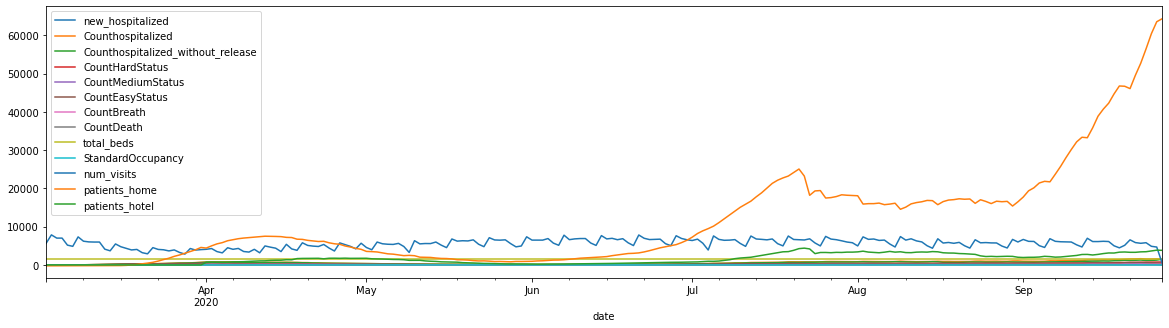

In [14]:

dfs['patientsPerDate'].plot(figsize=(20,5))
#plt.plot(dfs['patientsPerDate']['date'], dfs['patientsPerDate'])